In [2]:
import numpy as np
import pandas as pd

In [97]:
df = pd.read_csv('../data/airport.csv')
df.head()

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
0,Abakan,2019,44.70,66.21,72.7,75.82,100.34,78.38,63.88,73.06,66.74,75.44,110.5,89.8,917.57,"(Decimal('91.399735'), Decimal('53.751351'))"
1,Aikhal,2019,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,"(Decimal('111.543324'), Decimal('65.957161'))"
2,Loss,2019,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,"(Decimal('125.398355'), Decimal('58.602489'))"
3,Amderma,2019,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,"(Decimal('61.577429'), Decimal('69.759076'))"
4,Anadyr (Carbon),2019,81.63,143.01,260.9,304.36,122.00,106.87,84.99,130.00,102.00,118.00,94.0,199.0,1746.76,"(Decimal('177.738273'), Decimal('64.713433'))"


In [113]:
temp = df.loc[~(df.iloc[:,2:14].sum(1)==df['Whole year'])]
temp.iloc[:,2:14].sum(1)==temp['Whole year']

0       False
8       False
20      False
26      False
38      False
        ...  
3551    False
3559    False
3569    False
3637    False
3680    False
Length: 345, dtype: bool

In [101]:
(df.iloc[:,2:14].sum(1)!=df['Whole year']).sum()

345

In [108]:
(~df.iloc[:,2:14].sum(1)==df['Whole year'])

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [42]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
df = pd.read_csv('../data/audit.csv')
res_df = df.copy()
df = pd.concat([pd.get_dummies(df[['Marital', 'Gender']]),
     df[['Age','Income','Hours']].apply(
     lambda x:(x-x.min())/(x.max()-x.min())), df.Employment],1)
X_train = df.query('Employment.notna()')
X_test = df.query('Employment.isna()')
df_dummies = pd.get_dummies(X_train.Employment)
stack_list = []
for col in df_dummies.columns:
    clf = KNeighborsRegressor(n_neighbors=6)
    clf.fit(X_train.iloc[:,:-1], df_dummies[col])
    res = clf.predict(X_test.iloc[:,:-1]).reshape(-1,1)
    stack_list.append(res)
code_res = pd.Series(np.hstack(stack_list).argmax(1))
cat_res = code_res.replace(dict(zip(list(range(df_dummies.shape[0])),
                                               df_dummies.columns)))
res_df.loc[res_df.Employment.isna(), 'Employment'] = cat_res.values
res_df.isna().sum()

ID            0
Age           0
Employment    0
Marital       0
Income        0
Gender        0
Hours         0
dtype: int64

In [160]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(df.iloc[:,:2], df.Color)
clf.predict([[0.8, -0.2]])

df_dummies = pd.get_dummies(df.Color)
stack_list = []
for col in df_dummies.columns:
    clf = KNeighborsRegressor(n_neighbors=6)
    clf.fit(df.iloc[:,:2], df_dummies[col])
    res = clf.predict([[0.8, -0.2]]).reshape(-1,1)
    stack_list.append(res)
code_res = pd.Series(np.hstack(stack_list).argmax(1))
df_dummies.columns[code_res[0]]

X_1    855
X_2    894
y        0
dtype: int64

In [183]:
cat_1 = df.X_1.fillna('NaN').mask(df.X_1.notna()).fillna("NotNaN")
cat_2 = df.X_2.fillna('NaN').mask(df.X_2.notna()).fillna("NotNaN")
pd.crosstab(cat_1, df.y, margins=True)

y,0,1,All
X_1,,,
NaN,785,70,855
NotNaN,133,12,145
All,918,82,1000


In [212]:
def compute_S(my_df):
    S = []
    for i in range(2):
        for j in range(2):
            E = my_df.iat[i, j]
            F = my_df.iat[i, 2]*my_df.iat[2, j]/my_df.iat[2,2]
            S.append((E-F)**2/F)
            print(F)
    return sum(S)
compute_S(pd.crosstab(cat_1, df.y, margins=True))

784.89
70.11
133.11
11.89


0.0012965662713972017

In [213]:
chi2_contingency(pd.crosstab(cat_1, df.y), correction=False)

(0.0012965662713972017,
 0.9712760884395901,
 1,
 array([[784.89,  70.11],
        [133.11,  11.89]]))

In [209]:
from scipy.stats import chi2
chi2.sf(0.016435270685762227, 1)

0.8979906053616155

In [158]:
df = pd.DataFrame({'X_1':np.random.choice([np.nan,1],1000,p=[0.85,0.15]),
                   'y':np.random.choice([0,1],1000,p=[0.9,0.1])})
df['X_2'] = [np.random.choice([np.nan,1],p=[0.025,0.975]) if i == 1 else np.random.choice([np.nan,1],p=[0.975,0.025]) for i in df.y]
res1 = pd.crosstab(df.X_1.fillna('NaN'), df.y)
res2 = pd.crosstab(df.X_2.fillna('NaN'), df.y)
chi2_contingency(res1.values), chi2_contingency(res2.values)

((0.016298159494174517,
  0.8984146867233628,
  1,
  array([[133.11,  11.89],
         [784.89,  70.11]])),
 (743.1188624676493,
  1.257817888424288e-163,
  1,
  array([[ 97.308,   8.692],
         [820.692,  73.308]])))

In [159]:
df.X_1 = (df.X_1 + np.random.rand(1000)*50).round()
df.X_2 = (df.X_2 + np.random.rand(1000)*500).round()
df[['X_1','X_2','y']].to_csv('../data/missing_chi.csv', index=False)

In [59]:
np.random.choice([np.nan,1],p=[0.9,0.1])

nan

In [14]:
my_dt = df.index.shift(freq='-6H')
int_loc = [df.index.get_loc(i, method='nearest') for i in my_dt]
res = df.Radiation.iloc[int_loc]
res.tail()

Datetime
2016-09-01 00:00:08     2.58
2016-09-01 00:00:08     2.58
2016-09-01 00:00:08     2.58
2016-09-01 00:00:08     2.58
2016-09-01 00:00:08     2.58
                       ...  
2016-12-31 17:35:01    15.96
2016-12-31 17:40:06    11.98
2016-12-31 17:45:02     9.33
2016-12-31 17:50:01     8.49
2016-12-31 17:55:02     5.84
Name: Radiation, Length: 32686, dtype: float64

In [286]:
df

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...
32681,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [282]:
df_A = pd.DataFrame(np.random.rand(10,3), columns=['A_col%d'%i for i in range(3)])
df_B = pd.DataFrame(np.random.rand(10,3), columns=['B_col%d'%i for i in range(3)])
res = df_A.apply(lambda x:(x.max(), x.min()))
dict1 = dict(zip(df_A.columns,res.T.values))
dict2 = dict(zip(df_B.columns, df_A.columns))
def change(s):
    max_v, min_v = dict1[dict2[s.name]]
    ans = (s - min_v) / (max_v - min_v)
    return ans
df_B.apply(change)

,B_col0,B_col1,B_col2
0,0.533980,0.254652,0.027310
1,0.901979,0.245290,0.653917
2,0.554849,0.606316,0.717009
3,1.010615,0.071547,0.542605
4,0.495863,0.330761,-0.093141
5,0.809030,0.167784,0.253094
6,0.492364,0.493630,0.009426
7,0.254669,-0.024399,0.739520
8,0.556635,0.845837,0.549250
9,0.674067,0.323271,0.736828


In [174]:
target_dt = df.drop_duplicates().groupby(df.Date.drop_duplicates().dt.month)['Date'].nlargest(5).reset_index(drop=True)
res = df.set_index('Date').loc[target_dt].reset_index().query("Fruit == 'Pear'")
res = res.groupby(res.Date.dt.month)['Sale'].mean().rename_axis('Month')
res.head()

Month
1    59.266667
2    56.461538
3    54.911111
4    56.157895
5    55.917808
Name: Sale, dtype: float64

In [183]:
df[df.Date.isin(pd.date_range('20190101', '20191231', freq='BM'))].query("Fruit == 'Pear'").groupby('Date').Sale.mean()

Date
2019-01-31    60.500000
2019-02-28    59.538462
2019-03-29    56.666667
2019-04-30    64.800000
2019-05-31    61.600000
2019-06-28    67.222222
2019-07-31    63.083333
2019-08-30    71.714286
2019-09-30    78.000000
2019-10-31    62.750000
2019-11-29    62.789474
Name: Sale, dtype: float64

In [215]:
df_grape = df.query("Fruit == 'Grape'")
res = df_grape.groupby([np.where(df_grape.Date.dt.day<=15,
                            'First', 'Second'),df_grape.Date.dt.month]
                            )['Sale'].mean().to_frame().unstack(0
                            ).droplevel(0,axis=1)
res = (res.First/res.Second).rename_axis('Month')
res.head()

Month
1    1.174998
2    0.968890
3    0.951351
4    1.020797
5    0.931061
dtype: float64

In [72]:
df = pd.read_csv('../data/solar.csv', usecols=['Data','Time',
                     'Radiation','WindDirection(Degrees)',
                     'Speed','TimeSunRise','TimeSunSet'])
df.head(3)

,Data,Time,Radiation,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,9/29/2016 12:00:00 AM,23:55:26,1.21,177.39,5.62,06:13:00,18:13:00
1,9/29/2016 12:00:00 AM,23:50:23,1.21,176.78,3.37,06:13:00,18:13:00
2,9/29/2016 12:00:00 AM,23:45:26,1.23,158.75,3.37,06:13:00,18:13:00


In [74]:
solar_date = df.Data.str.extract('([/|\w]+\s).+')[0]
df['Data'] = pd.to_datetime(solar_date + df.Time)
df['TimeSunRise'] = pd.to_datetime(solar_date + df.TimeSunRise)
df['TimeSunSet'] = pd.to_datetime(solar_date + df.TimeSunSet)
df = df.drop(columns='Time').rename(columns={'Data':'Datetime'}
            ).set_index('Datetime').sort_index()
df.head(3)

,Radiation,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
Datetime,,,,,
2016-09-01 00:00:08,2.58,77.27,11.25,2016-09-01 06:07:00,2016-09-01 18:38:00
2016-09-01 00:05:10,2.83,153.44,9.00,2016-09-01 06:07:00,2016-09-01 18:38:00
2016-09-01 00:20:06,2.16,142.04,7.87,2016-09-01 06:07:00,2016-09-01 18:38:00


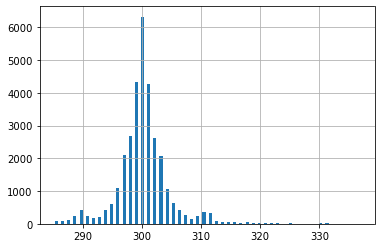

In [70]:
s = df.index.to_series().reset_index(drop=True).diff().dt.total_seconds()
res = s.mask((s>s.quantile(0.99))|(s<s.quantile(0.01))).hist(bins=50, rwidth=0.5)

In [81]:
df.Radiation.resample('4H').transform('mean')

Datetime
2016-09-01 00:00:08    2.609767
2016-09-01 00:05:10    2.609767
2016-09-01 00:20:06    2.609767
2016-09-01 00:25:05    2.609767
2016-09-01 00:30:09    2.609767
                         ...   
2016-12-31 23:35:02    1.213542
2016-12-31 23:40:01    1.213542
2016-12-31 23:45:04    1.213542
2016-12-31 23:50:03    1.213542
2016-12-31 23:55:01    1.213542
Name: Radiation, Length: 32686, dtype: float64

In [85]:
df.Radiation.rolling('4H').mean()

Datetime
2016-09-01 00:00:08    2.580000
2016-09-01 00:05:10    2.705000
2016-09-01 00:20:06    2.523333
2016-09-01 00:25:05    2.445000
2016-09-01 00:30:09    2.406000
                         ...   
2016-12-31 23:35:02    1.214167
2016-12-31 23:40:01    1.213958
2016-12-31 23:45:04    1.213750
2016-12-31 23:50:03    1.213542
2016-12-31 23:55:01    1.213469
Name: Radiation, Length: 32686, dtype: float64

In [89]:
df.Radiation.resample('4H', origin='02:00:00').transform('mean')

Datetime
2016-09-01 00:00:08    2.681500
2016-09-01 00:05:10    2.681500
2016-09-01 00:20:06    2.681500
2016-09-01 00:25:05    2.681500
2016-09-01 00:30:09    2.681500
                         ...   
2016-12-31 23:35:02    1.205833
2016-12-31 23:40:01    1.205833
2016-12-31 23:45:04    1.205833
2016-12-31 23:50:03    1.205833
2016-12-31 23:55:01    1.205833
Name: Radiation, Length: 32686, dtype: float64

In [104]:
df.Radiation.rolling('4H').agg(lambda x:x[0])

Datetime
2016-09-01 00:00:08    2.58
2016-09-01 00:05:10    2.58
2016-09-01 00:20:06    2.58
2016-09-01 00:25:05    2.58
2016-09-01 00:30:09    2.58
                       ... 
2016-12-31 23:35:02    1.22
2016-12-31 23:40:01    1.22
2016-12-31 23:45:04    1.20
2016-12-31 23:50:03    1.21
2016-12-31 23:55:01    1.21
Name: Radiation, Length: 32686, dtype: float64

In [115]:
idx = pd.Index([1,2,3])
pd.Index([4,5,6]).get_loc(idx[0], method='nearest')

0